<a href="https://colab.research.google.com/github/AGhost71/mdb-docs-and-content/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


<Axes: >

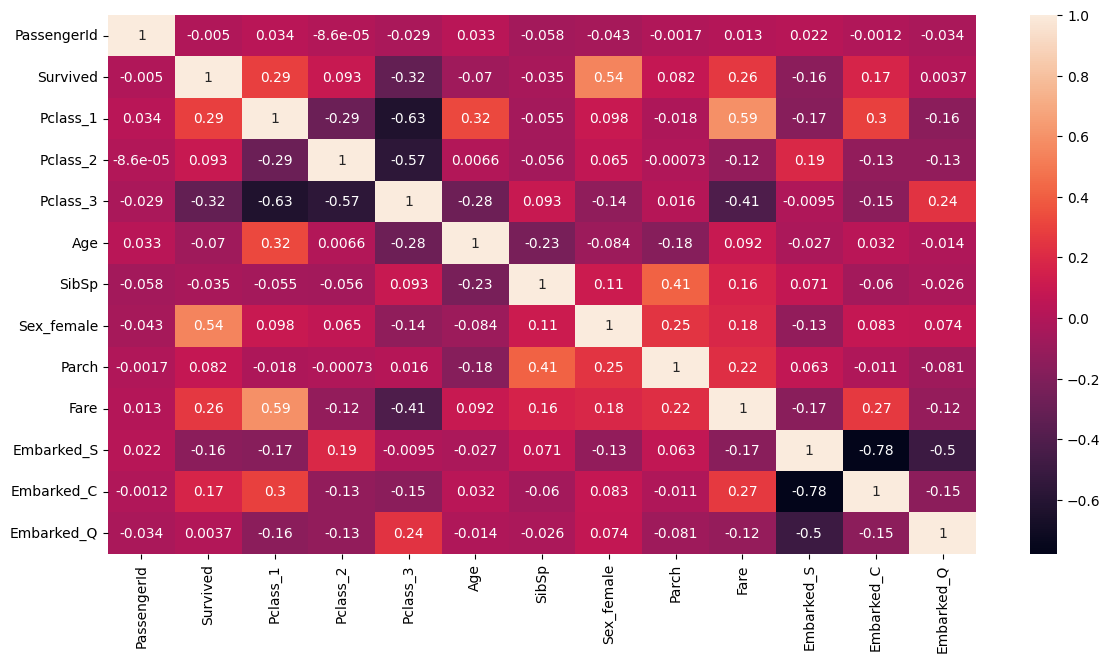

In [10]:
age_mean = df["Age"].mean()
df['Age'] = df['Age'].fillna(age_mean)
df = df.fillna(0)
new_data = pd.get_dummies(df,columns=["Sex",'Embarked','Pclass'])

plt.figure(figsize=(14,7))
sb.heatmap(data=new_data.loc[:,["PassengerId",'Survived','Pclass_1','Pclass_2','Pclass_3','Age','SibSp','Sex_female','Parch','Fare','Embarked_S','Embarked_C','Embarked_Q']].corr(),annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pclass', ylabel='Fare'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


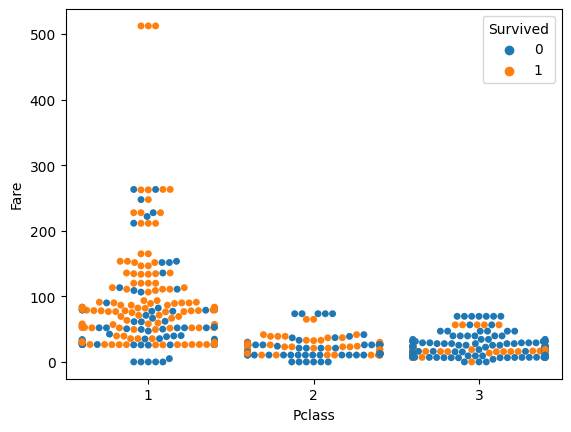

In [7]:
sb.swarmplot(y=new_data['Fare'],x=new_data['Pclass'],hue=new_data['Survived'])

In [11]:
new_data.drop(['PassengerId','Name','Cabin','Sex_male','Ticket','Embarked_0','Parch','SibSp','Age'], axis=1, inplace=True)
print(new_data.head)

<bound method NDFrame.head of      Survived     Fare  Sex_female  Embarked_C  Embarked_Q  Embarked_S  \
0           0   7.2500           0           0           0           1   
1           1  71.2833           1           1           0           0   
2           1   7.9250           1           0           0           1   
3           1  53.1000           1           0           0           1   
4           0   8.0500           0           0           0           1   
..        ...      ...         ...         ...         ...         ...   
886         0  13.0000           0           0           0           1   
887         1  30.0000           1           0           0           1   
888         0  23.4500           1           0           0           1   
889         1  30.0000           0           1           0           0   
890         0   7.7500           0           0           1           0   

     Pclass_1  Pclass_2  Pclass_3  
0           0         0         1  
1        

In [29]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test=test.fillna(0)
test = pd.get_dummies(test,columns=["Sex",'Embarked','Pclass'])
print(new_data.info())
print(test.info())
test_x = test.drop(['PassengerId','Name','Sex_male','Cabin','Ticket','Parch','SibSp','Age'],axis=1).to_numpy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Fare        891 non-null    float64
 2   Sex_female  891 non-null    uint8  
 3   Embarked_C  891 non-null    uint8  
 4   Embarked_Q  891 non-null    uint8  
 5   Embarked_S  891 non-null    uint8  
 6   Pclass_1    891 non-null    uint8  
 7   Pclass_2    891 non-null    uint8  
 8   Pclass_3    891 non-null    uint8  
dtypes: float64(1), int64(1), uint8(7)
memory usage: 20.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    object 
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 

In [28]:
train_x = new_data.drop('Survived',axis=1).to_numpy()
train_y = new_data['Survived'].to_numpy()


In [22]:
scale = StandardScaler()
train_x = scale.fit_transform(train_x)
test_x = scale.transform(test_x)




In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {"hidden_layer_sizes":[[10,10],[100,50],[1000,100,10],[128,64,32,16],[100,10]],
              "solver":['adam','sgd'],
              "activation":['tanh','relu','identity', 'logistic'],
              "max_iter":[2000]}
search_1 = GridSearchCV(MLPClassifier(),param_grid=param_grid,cv=5)
search_1.fit(train_x,train_y)
predict=search_1.predict(test_x)


In [24]:
print(search_1.best_params_)
print(search_1.best_score_)

predict = search_1.predict(test_x)

{'activation': 'relu', 'hidden_layer_sizes': [10, 10], 'max_iter': 2000, 'solver': 'adam'}
0.8069926558282594


In [38]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[100,200,1000],
              "max_depth":[1,3,5,7],
              "min_samples_leaf":[5,3,7,10],
              'max_features':[1,2,4,8]}
search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=3)
search.fit(train_x,train_y)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': [1, 2, 4, 8],
                         'min_samples_leaf': [5, 3, 7, 10],
                         'n_estimators': [100, 200, 1000]})

In [39]:
print(search.best_params_)
print(search.best_score_)

predict = search.predict(test_x)

{'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 200}
0.8103254769921436


In [34]:
model = MLPClassifier(activation= 'logistic', hidden_layer_sizes= [10, 10], max_iter= 2000, solver= 'adam')
model.fit(train_x,train_y)
print(model.score(train_x,train_y))
predict = model.predict(test_x)


0.8092031425364759


<Axes: ylabel='Count'>

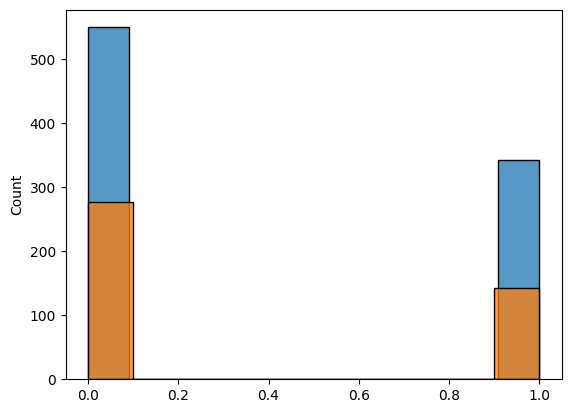

In [40]:
sb.histplot(train_y)
sb.histplot(predict)

In [41]:
r = np.vstack((test["PassengerId"],predict))
res = pd.DataFrame(data=r.T,columns=['PassengerId','Survived'])
res.to_csv("result.csv",index=False)
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
